<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data-from--Italian-Protezione-Civile-and-JHU-and-compare-them" data-toc-modified-id="Import-data-from--Italian-Protezione-Civile-and-JHU-and-compare-them-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data from  Italian Protezione Civile and JHU and compare them</a></span></li><li><span><a href="#Analyse-the-data-from-the-IPC" data-toc-modified-id="Analyse-the-data-from-the-IPC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse the data from the IPC</a></span></li><li><span><a href="#Explain-scatter-plot-from-the-last-course" data-toc-modified-id="Explain-scatter-plot-from-the-last-course-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explain scatter plot from the last course</a></span><ul class="toc-item"><li><span><a href="#Change-of-slope" data-toc-modified-id="Change-of-slope-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Change of slope</a></span></li><li><span><a href="#Explain-reversal-behavior" data-toc-modified-id="Explain-reversal-behavior-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Explain reversal behavior</a></span></li><li><span><a href="#Comparing-reversal-to-other-countries" data-toc-modified-id="Comparing-reversal-to-other-countries-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comparing reversal to other countries</a></span></li><li><span><a href="#I-am-running-out-of-ideas" data-toc-modified-id="I-am-running-out-of-ideas-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>I am running out of ideas</a></span></li></ul></li><li><span><a href="#Predicting-the-future-of-the-epidemic" data-toc-modified-id="Predicting-the-future-of-the-epidemic-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting the future of the epidemic</a></span></li><li><span><a href="#German-local-data" data-toc-modified-id="German-local-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>German local data</a></span></li></ul></div>

This notebook is about practicing pandas to better understand the COVID-19 outbreak in Italy and worldwide. I will provide 4 questions/problems that you might try to answer by analyzing the data. You don't have to answer all of them. Choose the oneS you are interested in. Anyway, I would appreciate if you could send me your Notebook afterwards (robert.biele1@tu-dresden.de). Looking forward reading them.

## Import data from  Italian Protezione Civile and JHU and compare them

In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import shutil

# set some plotting styles
%matplotlib inline
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 90.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Let us first import the data for Italy from the JHU and save it as <code>daily_jhu</code>.

In [2]:
# this creates the latest csv files in data/
%run ./data/create_clean_csv_files_covid.ipynb

shutil.copy2('cases.csv', 'data/')
shutil.copy2('deaths.csv', 'data/')

The data is from 06/05/2020.


'data/deaths.csv'

In [3]:
# import the data from the JHU
file = 'data/cases.csv'
cases = pd.read_csv(file,index_col=0)   # Read data from CSV file
cases.index.name = None

file = 'data/deaths.csv'   # import cases
deaths = pd.read_csv(file,index_col=0)   # Read data from CSV file
deaths.index.name = None # no name for index

daily_cases = cases.diff(axis=1).fillna(0)
daily_deaths = deaths.diff(axis=1).fillna(0)

# daily_jhu is a DataFrame containing two columns, daily_cases and daily_deaths in country
country = 'Italy'

daily_jhu = daily_cases.loc[[country]].transpose()
daily_jhu.rename(columns={country: 'daily_cases'}, inplace=True)
daily_jhu['daily_deaths'] = daily_deaths.loc[country]

# let's also change the index to a proper DateTime
date_format = [pd.to_datetime(d)for d in daily_jhu.index]
daily_jhu.index = date_format
daily_jhu.tail()

,daily_cases,daily_deaths
2020-05-02,1900.0,474.0
2020-05-03,1389.0,174.0
2020-05-04,1221.0,195.0
2020-05-05,1075.0,236.0
2020-05-06,1444.0,369.0


---

The DataFrame <code>daily_jhu</code> contains the data for Italy from the JHU. Now let's import a csv file about COVID-19 released by the *Italian Protezione Civile* (IPC).

In [4]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/'
daily_ipc = pd.read_csv(url + 'dpc-covid19-ita-andamento-nazionale.csv',index_col=0)
 
# change index to real dateTime
daily_ipc.index = [pd.to_datetime(d).replace(hour=0) for d in daily_ipc.index]

daily_ipc.head()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2020-02-26,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
2020-02-27,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
2020-02-28,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


---

The columns are in Italian. Let's try to translate this directly in Python. DeepL is only for paying subscribers, however the Google Translate API is free.

> Googletrans is a free and unlimited python library that implemented Google Translate API. This uses the Google Translate Ajax API to make calls to such methods as detect and translate.

In [5]:
# in case you have installed it uncommend the next line
!pip install googletrans
from googletrans import Translator

col_list = []
for col in daily_ipc.columns:
    col_list.append( col.replace('_', ' ') ) # we replace '_' by a space for translation

english_cols = Translator().translate(col_list, src='it', dest='en') # this translates col_list to english

for i in range(len(english_cols)):
    english_cols[i] = english_cols[i].text.replace(' ','_') # we replace now the spaces by '_'

daily_ipc.columns = english_cols # and set the columns of the DataFrame to the english texts
daily_ipc.head()

  Using cached https://files.pythonhosted.org/packages/fd/f0/a22d41d3846d1f46a4f20086141e0428ccc9c6d644aacbfd30990cf46886/googletrans-2.4.0.tar.gz
  Created wheel for googletrans: filename=googletrans-2.4.0-cp35-none-any.whl size=20591 sha256=550f5ecf822e1cc44e86b2c8c97df6dfc6268d82dc92f85d6f6a21ffea7a6039
  Stored in directory: /home/nbuser/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
You should consider upgrading via the 'pip install --upgrade pip' command.


,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,isolation_at_home,total_positive,total_positive_variation,new_positive,discharged_healed,deceased,total_cases,swabs,cases_tested,it_notes,notes_en
2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2020-02-26,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
2020-02-27,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
2020-02-28,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


---

Great! The DataFrame <code>daily_ipc</code> contains much more information than <code>daily_jhu</code>. What is the name of the column that correspond to daily new infections? Plot it over time and compare it with <code>daily_jhu['daily_cases']</code>. Does they coincide? What is the difference?

In [6]:
# as the data from the JHU starts earlier than the other data, we will just adjust it
daily_jhu = daily_jhu.loc[daily_ipc.index]
#  plot ...


Click **here** for solution.
<!--
daily_jhu['daily_cases'].plot(kind='line',label = 'JHU')
daily_ipc['new_positive'].plot(kind='line',label='IPC')
plt.legend()
plt.title('title')
plt.ylabel('daily new infections');  -->

---

Does the data from the IPC contains the information about the daily deaths? If not, please add it to the DataFrame and plot the number of daily deaths from the IPC and JHU.

In [7]:
# 
daily_ipc['daily_deaths'] = daily_ipc['deceased'].diff()
daily_ipc.tail()

2020-05-02    474.0
2020-05-03    174.0
2020-05-04    195.0
2020-05-05    236.0
2020-05-06    369.0
Name: daily_deaths, dtype: float64

In [8]:
# plot...


Click **here** for solution.
<!--
daily_ipc['daily_deaths'].plot(label='IPC')
daily_jhu['daily_deaths'].plot(label='JHU')
plt.legend()-->

The data are pretty much the same so let us only use daily_ipc in the following.

## Analyse the data from the IPC

What other columns are contained in <code>daily_ipc</code>? Plot a selection of them which might be important to understand the epidemic in Italy.

---

What relations between those quantities exist? Use scatter plots to search for relations between them. (as we did before with daily deaths and new infections) Do you find something interesting?

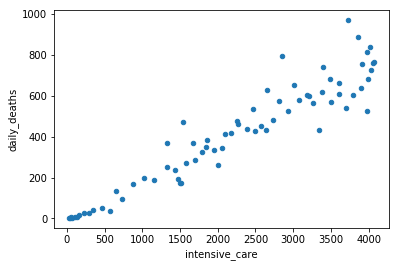

In [9]:
# here is an example
daily_ipc.plot(kind='scatter',x = 'intensive_care',y='daily_deaths' );

In [10]:
# ...

## Explain scatter plot from the last course

### Change of slope

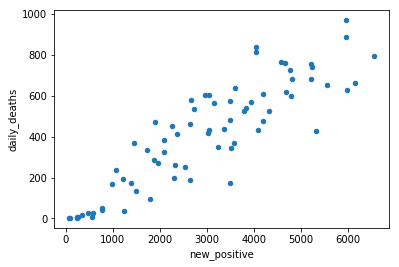

In [11]:
ax = daily_ipc.plot(kind='scatter',x='new_positive',y='daily_deaths');

<img src='images/plot.jpg' width=400>

We can see a change in the relation at around new_positive=1000: The slope changes and the spread increases. Any idea what is the reason for this? Or is this common for an epidemic? Try to plot just the first 30 days (<code>iloc[]</code>) and apply an average (<code>rolling(7).mean()</code>). Afterwards: What happens if you choose a log scale on y (<code>ax.set_yscale('log')</code>)? 

In [12]:
# scatter plot...



Click **here** for a code example.
<!--
ax = daily_ipc.rolling(7).mean().iloc[:30].plot(kind='scatter',x='new_positive',y='daily_deaths');
ax.set_yscale('log')-->

### Explain reversal behavior

Looking at the following scatter plot:

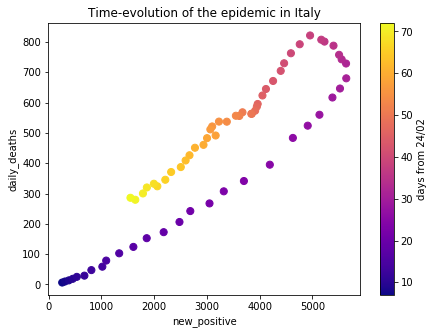

In [16]:
from matplotlib import cm
# try with 1 and with 7 can you see the pattern in time?
window = 7

time = range(len(daily_ipc.index))
cmap = cm.get_cmap('plasma')

fig, ax = plt.subplots()
daily_ipc.rolling(window).mean().plot(kind='scatter',
                        x='new_positive',y='daily_deaths',
                        c = time, s = 50, cmap = cmap,
                        ax = ax, figsize=(7, 5),
                        title='Time-evolution of the epidemic in Italy');
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('days from 24/02');

Explain what is shown here and why it is surprising.

...your text

Can you find any explanation of the behavior by looking at the complete data of the IPC?

some text

In [14]:
# some code

### Comparing reversal to other countries

How are other countries behaving? Does it look similar? Try to repeat the scatter plot above for other countries. 
The data is still in <code>daily_cases</code> and <code>daily_deaths</code>. (You just need to choose the country and plot it). What about South Korea, Sweden, Belgium, Russia,...

In [15]:
# daily_jhu is a DataFrame containing two columns, daily_cases and daily_deaths in country
country = 'Russia'

daily_country = daily_cases.loc[[country]].transpose()
daily_country.rename(columns={country: 'daily_cases'}, inplace=True)
daily_country['daily_deaths'] = daily_deaths.loc[country]

# let's also change the index to a proper DateTime
date_format = [pd.to_datetime(d)for d in daily_country.index]
daily_country.index = date_format
daily_country.tail()
# ...

,daily_cases,daily_deaths
2020-05-02,9623.0,53.0
2020-05-03,10633.0,58.0
2020-05-04,10581.0,76.0
2020-05-05,10102.0,95.0
2020-05-06,10559.0,86.0


What about normalizing the data to inhabitants and plot the reversal behavior of many countries in a single scatter plot. Make some nice plots and write some conclusions.

### I am running out of ideas

What else could be interesting to look at and understand? Maybe predicting the future (see next section). Do you have other ideas?

## Predicting the future of the epidemic

If you are still interested in the topic, take a look at the following article to get an idea how to investigate further the COVID-19 outbreak in Italy (https://towardsdatascience.com/italian-covid-19-analysis-with-python-1bdb0e64d5ac). As this is an article from the beginning of April that tries to predict the future of the epidemic, try to see with the latest data if this predictions has been fulfilled or not.

## German local data

Also if you are interested in the Outbreak in Germany locally, you might analyse this data:
https://www.kaggle.com/headsortails/covid19-tracking-germany